# **Soccer Player Detectiion** 

In [1]:
import torch
import ultralytics
from ultralytics import YOLO
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
model = YOLO("best.pt")

In [3]:
def inference(x):
    result = model(x)
    return result

In [4]:
def draw_bboxes(results):
  for result in results:
    img = result.orig_img
    boxes = result.boxes.xyxy
    classes = [int(i) for i in result.boxes.cls]
    class_names = [result.names[i] for i in classes]

    print(class_names)

    for i,bbox in enumerate(boxes):
      start = (round(float(bbox[0])),round(float(bbox[1])))
      end = (round(float(bbox[2])),round(float(bbox[3])))
      color = (255,0,0)
      img = cv2.rectangle(img, start, end, color, 2)
      img = cv2.putText(img, class_names[i], start, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
    return img


0: 384x640 14 players, 94.0ms
Speed: 5.0ms preprocess, 94.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
['player', 'player', 'player', 'player', 'player', 'player', 'player', 'player', 'player', 'player', 'player', 'player', 'player', 'player']


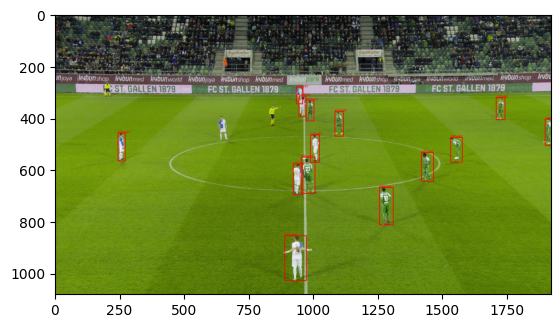

In [5]:
with Image.open("inference_img.jpg") as img:
    img = np.array(img)
    result = inference(img)
plt.imshow(draw_bboxes(result))

In [6]:
def vid_inference(path):
    cap = cv2.VideoCapture(path)

    while cap.isOpened():
        ret, frame = cap.read()
        # result = model(frame)
        # cv2.imshow('frame',draw_bboxes(result))
        if ret == True: 
            cv2.imshow('frame',frame)
        if cv2.waitKey(25) & 0xFF == ord('q'): 
            break
  
        else: 
            break
    cap.release() 
    cv2.destroyAllWindows() 



In [8]:
vid_inference("/inference_vid.webm")